# Game of Life analysis

Exploring the behavior of Conway's Game of Life with random input.




### 1. Exploring live cell count value vs timestep

Import modules, including the GameOfLife module which we will use to create our random games:

In [1]:
import GameOfLife3 as gol
import pandas as pd
import numpy as np
import time
import sys
import matplotlib.pyplot as plt

Create random game simulations:

In [2]:
game = gol.GameOfLife(10, 10) # game on a 10x10 grid
sim = game.simulate(300, 300) # 300 simmulations with 300 evolutions each
sim = np.array(sim)
sim.shape

(300, 300, 10, 10)

For each game in the simulation, create an array with the number of live cells for each time step:
<br>
* `simCounts[i]` is the list of live count values for the `i`th game.
<br>
* `simCounts[i][j]` is the number of live cells at the `j`th timestep in the `i`th game.

In [22]:
simCounts = []

for game in sim:
    gameCounts = []
    
    for grid in game:
        count = 0
        for row in grid:
            for cell in row:
                count += cell
        gameCounts.append(count)
        
    simCounts.append(gameCounts)
simCounts = np.array(simCounts)

Here are the live count values for the first game in the simulation:

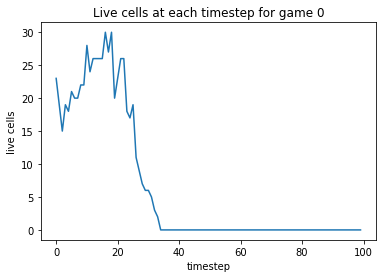

In [17]:
plt.plot(simCounts[0][:100])
plt.title('Live cells at each timestep for game 0')
plt.xlabel('timestep')
plt.ylabel('live cells')
plt.show()

Let's get a quick feel for what our whole dataset looks like:

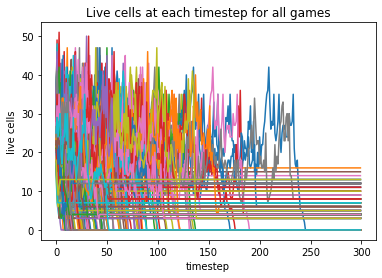

In [18]:
for gameCounts in simCounts:
    plt.plot(gameCounts)
plt.title('Live cells at each timestep for all games')
plt.xlabel('timestep')
plt.ylabel('live cells')
plt.show()

Yikes! Observations:
* All games appear to reach a stable state before 300 evolutions
* More games end early, but there is a long tail in the distribution of times to stability

#### 1. (a) Average live cells at timestep

Create two 1D arrays with the means and standard deviations of the live count values at each timestep:

In [35]:
countMeans = []
countStds = []

for i in range(simCounts.shape[1]):
    counts_at_i = np.array([gameCounts[i] for gameCounts in simCounts])
    countMeans.append(counts_at_i.mean())
    countStds.append(counts_at_i.std())

countMeans = np.array(countMeans)
countStds = np.array(countStds)

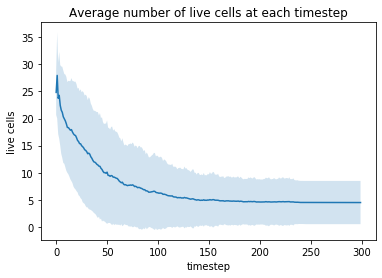

In [45]:
plt.plot(countMeans)
plt.fill_between(np.arange(300), countMeans - countStds, countMeans + countStds, alpha=0.2)
plt.title('Average number of live cells at each timestep')
plt.xlabel('timestep')
plt.ylabel('live cells')
plt.show()